In [186]:
# In this notebook, I will take a look at some stocks and use a model in an attempt to predict future stock behavior. 
# All information was gathered by Google Finance.

In [148]:
# Here are some imports that will help with the analysis
import numpy as np
import pandas as pd 
from pandas import Series,DataFrame
from pandas_datareader import DataReader
from datetime import datetime

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [150]:
# Here I shall take a look at the change in price for stocks over time

In [151]:
tech_stck = ['AAPL','AMZN','FB','GOOG']
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [152]:
start

datetime.datetime(2016, 8, 1, 0, 0)

In [153]:
for stock in tech_stck:
    globals()[stock] = DataReader(stock,'google',start,end)

In [154]:
AMZN.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-08-01,759.87,770.50,757.06,767.74,3578205
2016-08-02,763.81,765.01,757.02,760.58,3603280
2016-08-03,757.06,758.89,752.25,754.64,3581525
2016-08-04,753.70,765.00,750.35,760.77,3178208
2016-08-05,764.81,768.47,763.09,765.98,2704391


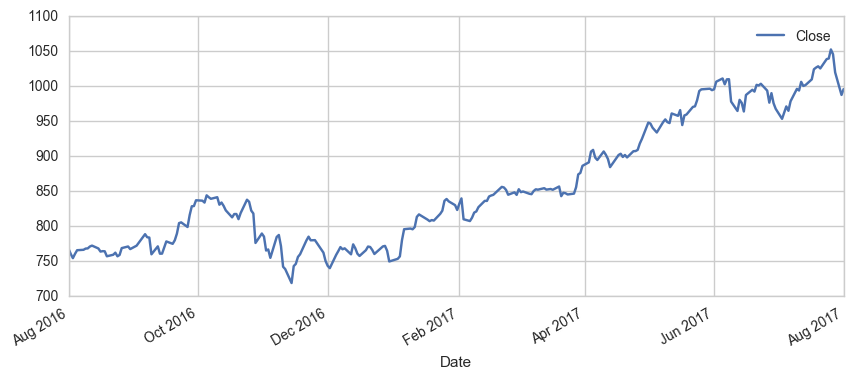

In [155]:
AMZN['Close'].plot(legend=True,figsize=(10,4))

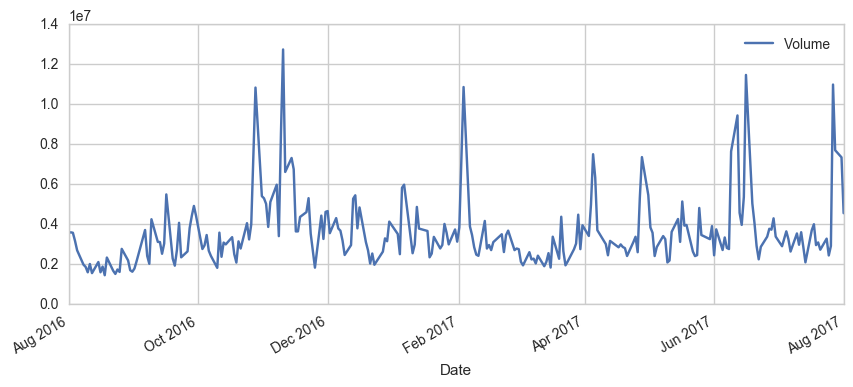

In [156]:
AMZN['Volume'].plot(legend=True,figsize=(10,4))

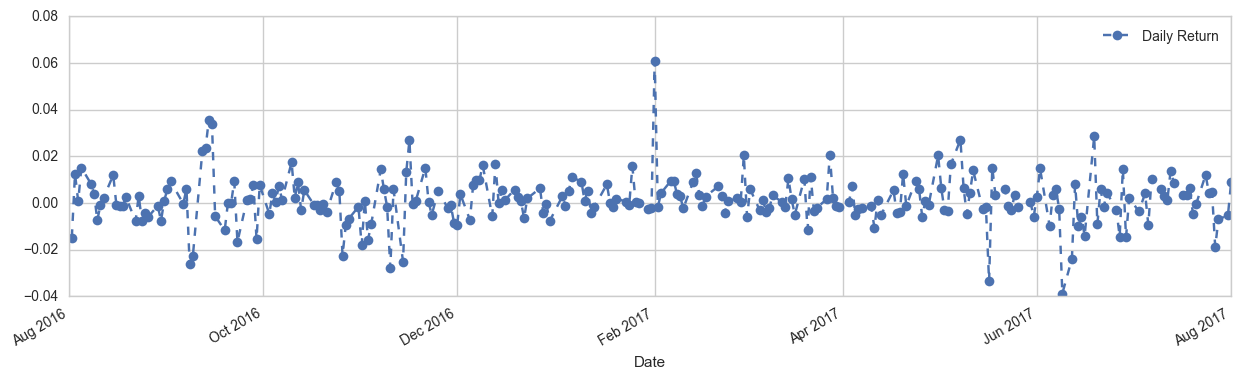

In [157]:
AMZN['Daily Return'] = AAPL['Close'].pct_change()
AMZN['Daily Return'].plot(figsize=(15,4),legend=True,linestyle='--',marker='o')

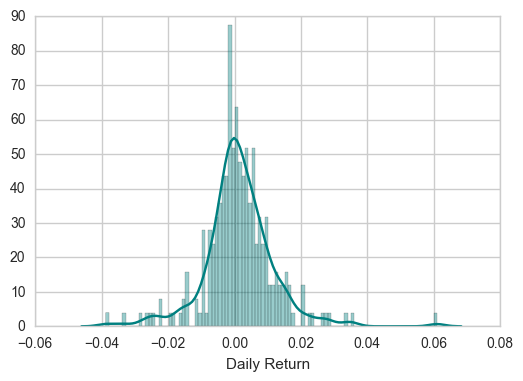

In [158]:
# Here I take a look at the average daily return
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='teal')

In [159]:
close_df = DataReader(['AAPL','AMZN','FB','GOOG'],'google',start,end)['Close']

In [160]:
close_df.head()

,AAPL,AMZN,FB,GOOG
Date,,,,
2016-08-01,106.05,767.74,124.31,772.88
2016-08-02,104.48,760.58,123.09,771.07
2016-08-03,105.79,754.64,122.51,773.18
2016-08-04,105.87,760.77,124.36,771.61
2016-08-05,107.48,765.98,125.15,782.22


In [161]:
# Form a dataframe that looks at the daily return for the stocks
returns = close_df.pct_change()

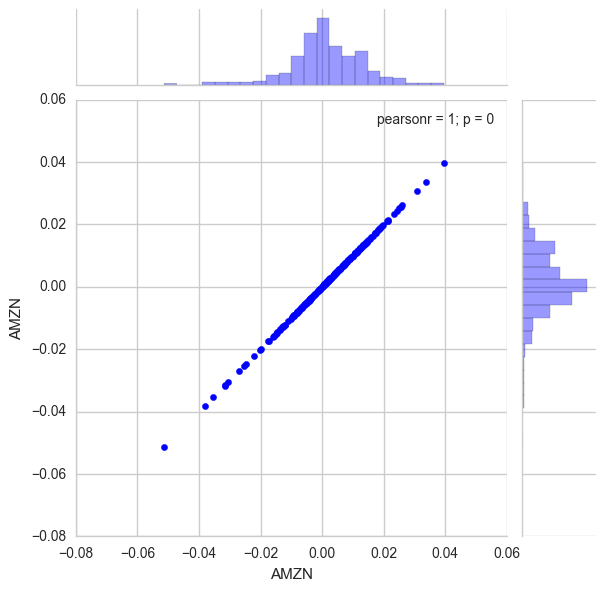

In [162]:
sns.jointplot('AMZN','AMZN',returns,kind='scatter',color='blue')

In [163]:
# As expected the two stocks are perfectly correlated with each other via a linear relationship with a pearson score 
# 1. This is too be expected but now let's look at the correlation with other companies

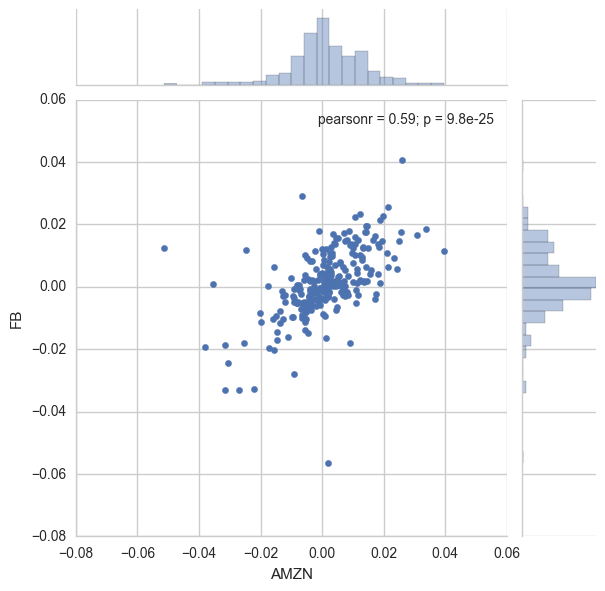

In [164]:
sns.jointplot('AMZN','FB',returns,kind='scatter')

In [165]:
# So from the above graph, we can see that Amazon and FaceBook stocks have a pearsonr of around .6, which is decent. 
# But there is a better way to look at all of the graphs at once

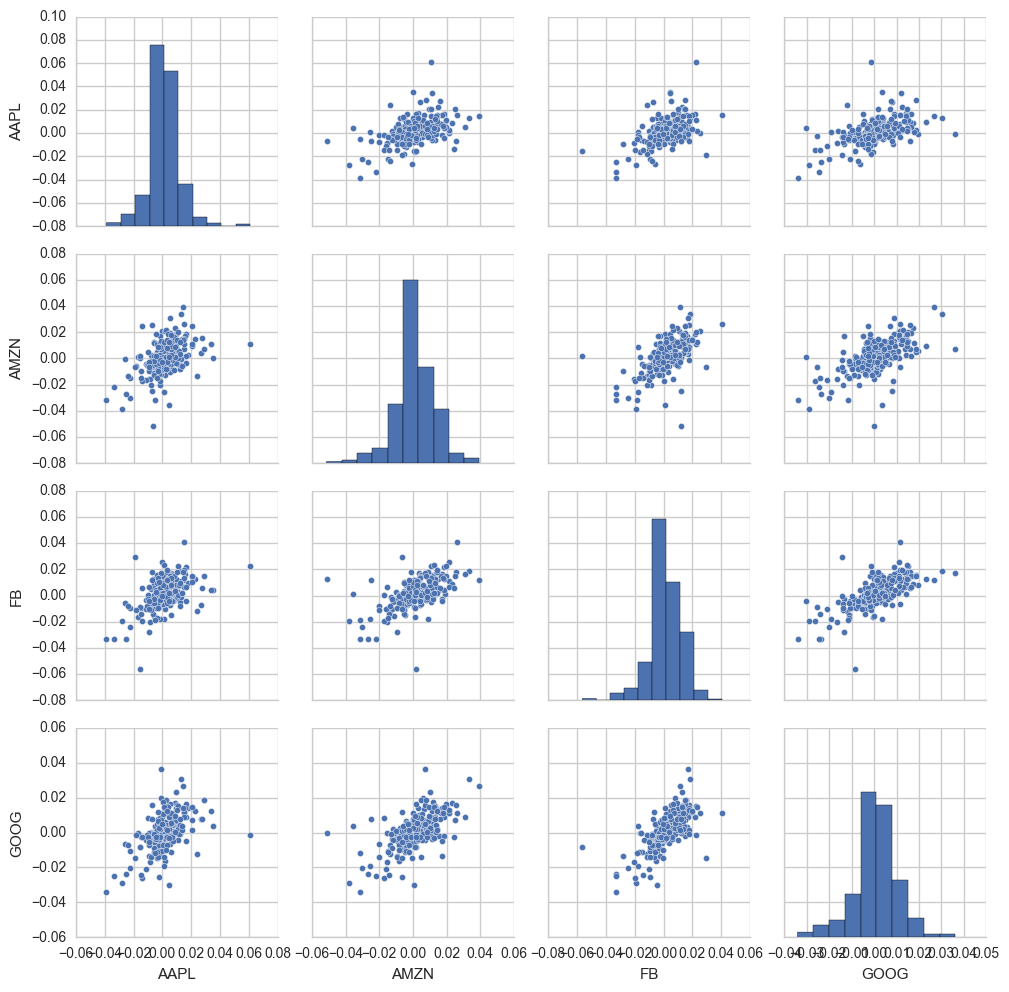

In [166]:
sns.pairplot(returns.dropna())

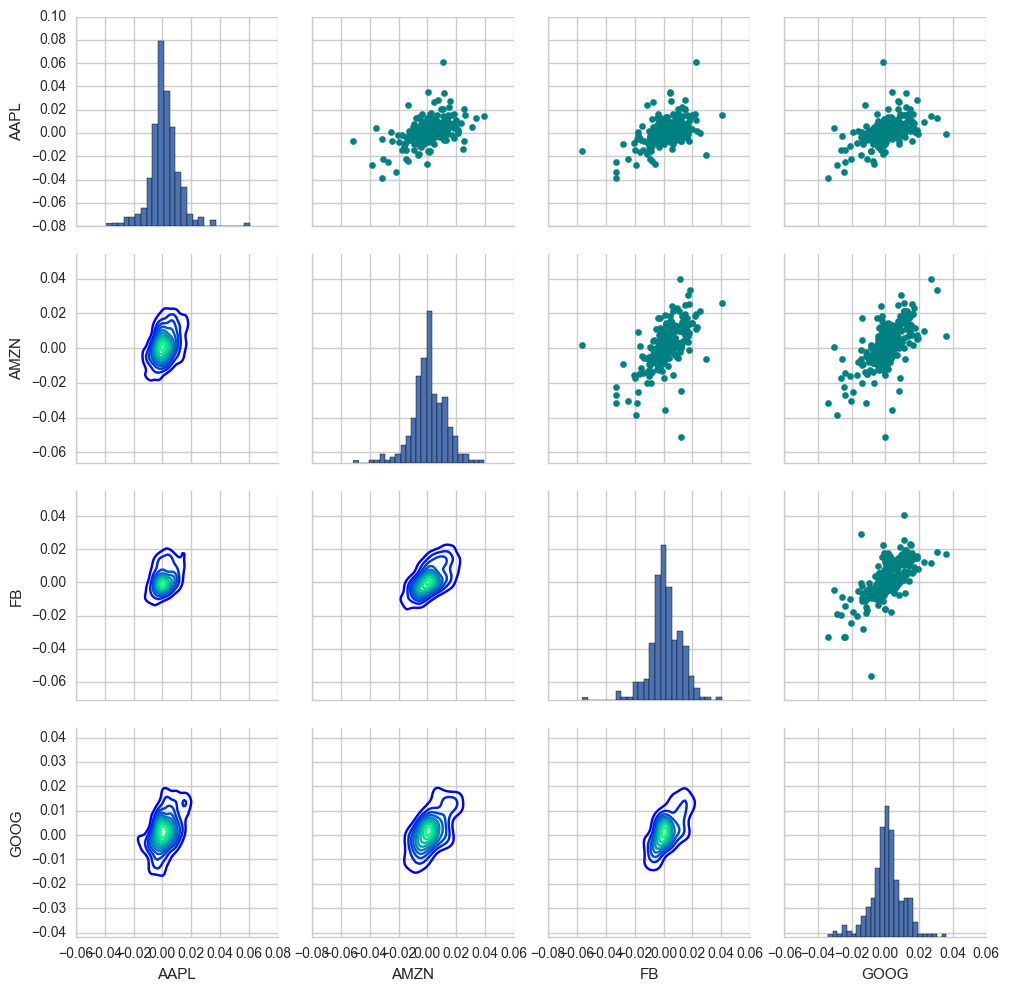

In [167]:
# Here I shall call upon a pairplot for the dataframe to get an even better understanding the comparisons between stocks
images = sns.PairGrid(returns.dropna())
images.map_upper(plt.scatter,color='teal')
images.map_lower(sns.kdeplot,cmap='winter')
images.map_diag(plt.hist,bins=25)

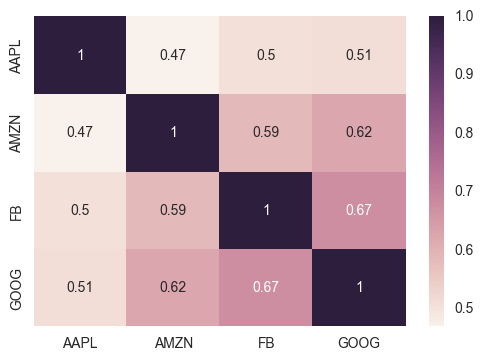

In [168]:
sns.heatmap(returns.dropna().corr(),annot=True)

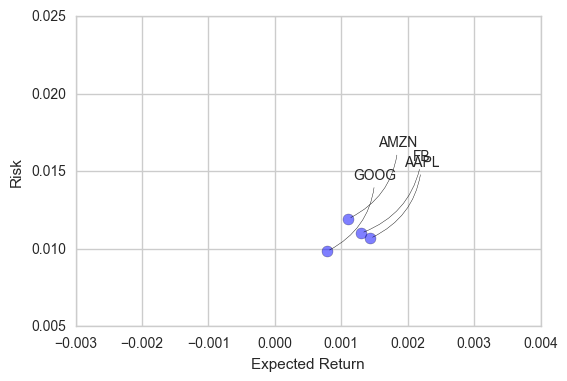

In [169]:
ret = returns.dropna()
area = np.pi*20
plt.scatter(ret.mean(),ret.std(),alpha= 0.5,s=area)
plt.ylim([0.005,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(ret.columns,ret.mean(),ret.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right',va='bottom',
        arrowprops = dict(arrowstyle = '-',connectionstyle = 'arc3,rad=-0.3'))

-0.017359727827884724

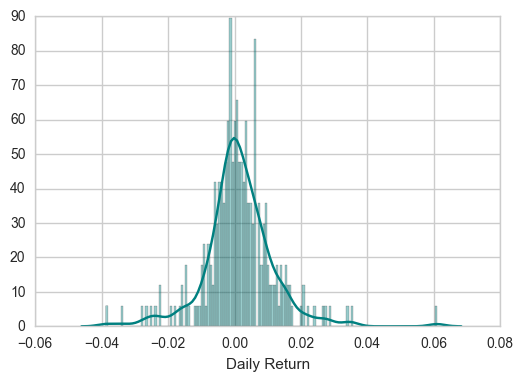

In [170]:
sns.distplot(AMZN['Daily Return'].dropna(),bins=150,color='teal')
ret['AMZN'].quantile(0.05)

In [171]:
# The information above tells us that with a 95% confidence, the most that can be loss for a daily return will not
# exceed 1.73%. In terms of money loss, an invest of around $100,000 may see a $1,730 is the value at risk.

In [172]:
# Using a Monte Carlo method for many simulations, lets take a look at the value of risk.

In [173]:
# Set up the variables that will be needed later
days = 365
delta = float(1)/days
mu = ret.mean()['AMZN'] # this is the drift for the expected returns
sigma = ret.std()['AMZN'] # this is the volatility for the stock based on the standard deviation

In [174]:
# Here a function is defined in order to recieve the necessary values that satifies the geometric Brownian Motion equation
def stockMC(start_price,days,my,sigma):

    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*delta,scale = sigma*np.sqrt(delta))
        drift[x] = mu* dt
        price[x] = price[x-1] + (price[x-1]* (drift[x] + shock[x]))
    return price


In [175]:
AMZN.head()

,Open,High,Low,Close,Volume,Daily Return
Date,,,,,,
2016-08-01,759.87,770.50,757.06,767.74,3578205,NaN
2016-08-02,763.81,765.01,757.02,760.58,3603280,-0.014804
2016-08-03,757.06,758.89,752.25,754.64,3581525,0.012538
2016-08-04,753.70,765.00,750.35,760.77,3178208,0.000756
2016-08-05,764.81,768.47,763.09,765.98,2704391,0.015207


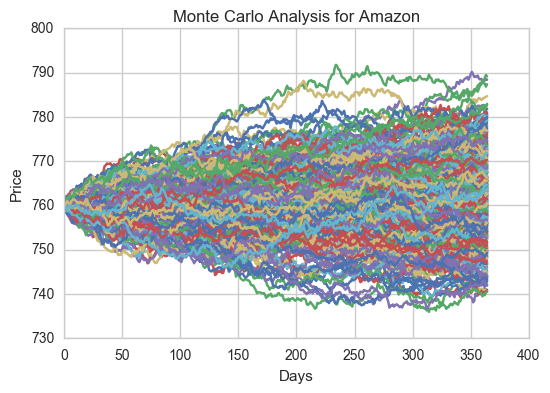

In [182]:
start_price = 759.87

for run in xrange(450):
     plt.plot(stock_mc(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title("Monte Carlo Analysis for Amazon")

In [183]:
runs = 100000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_mc(start_price,days,mu,sigma)[days-1];

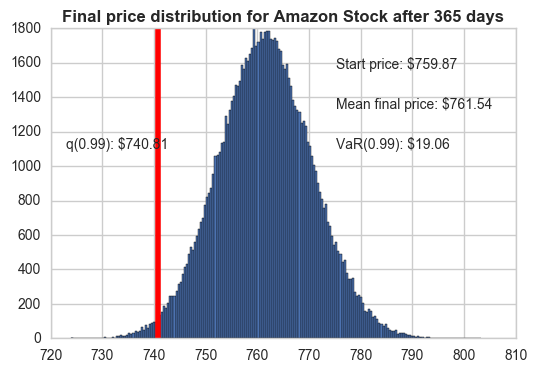

In [184]:

q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)
# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Amazon Stock after %s days" % days, weight='bold');

In [185]:
# From the graphs above, this helps estimate the value at risk for Amazon stocks. After running many trials, the value
# for Amazon is believed to rise. This is only a quick analysis for stock prices. 